# KIVA Exploratory Data Analysis

# Contents

- [Imports](#Imports)
- [Data Overview](#Data-Overview)
- [Univariate Analysis](#Univariate-Analysis)
- [Bivariate Analysis](#Bivariate-Analysis)
- [Loan Activity - USA v MEX](#Loan-Activity---USA-v-MEX)
- [Loan Themes by Region](#Loan-Themes-by-Region)
- [Region Univariate Analysis](#Region-Univariate-Analysis)
- [Region Bivariate Analysis](#Region-Bivariate-Analysis)

# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [11]:
cd data-science-for-good-kiva-crowdfunding/

/Users/julio0703/Documents/kaggle_data_projects/downloaded_data_folder/data-science-for-good-kiva-crowdfunding


In [12]:
loans = pd.read_csv('kiva_loans.csv')

# Data Overview

In [13]:
loans.shape

(671205, 20)

In [15]:
loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


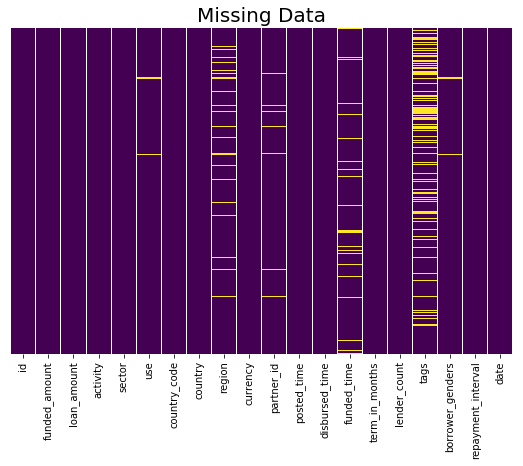

In [17]:
plt.figure(figsize=(9,6))
sns.heatmap(loans.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.title('Missing Data',fontsize=20)
plt.show()

In [122]:
type(loans['disbursed_time'][0])

str

Let's convert all dates to pandas Timestamp format.

In [58]:
loans['posted_time'] = pd.to_datetime(loans['posted_time'])
loans['disbursed_time'] = pd.to_datetime(loans['disbursed_time'])
loans['funded_time'] = pd.to_datetime(loans['funded_time'])

In [59]:
loans['month(dis)'] = loans['disbursed_time'].apply(lambda x: x.month)
loans['month(post)'] = loans['posted_time'].apply(lambda x: x.month)

# Univariate Analysis

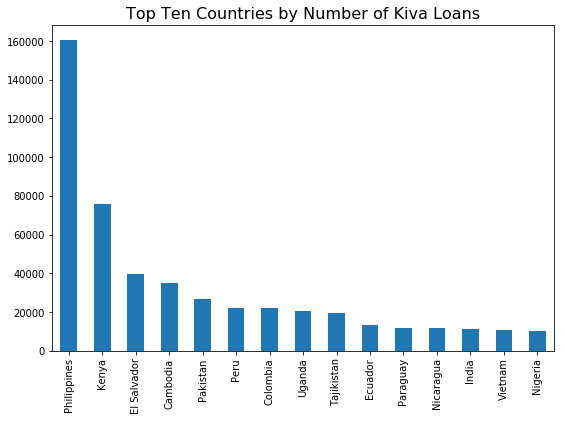

Top Ten Countries by Number of Kiva Loans

 Philippines    160441
Kenya           75825
El Salvador     39875
Cambodia        34836
Pakistan        26857
Peru            22233
Colombia        21995
Uganda          20601
Tajikistan      19580
Ecuador         13521
Paraguay        11903
Nicaragua       11781
India           11237
Vietnam         10843
Nigeria         10136
Name: country, dtype: int64


In [20]:
plt.figure(figsize=(9,6))
loans['country'].value_counts().head(15).plot.bar()
plt.title('Top Ten Countries by Number of Kiva Loans',fontsize=16)
plt.show()
print('Top Ten Countries by Number of Kiva Loans\n\n', loans['country'].value_counts().head(15))

In [21]:
country_count = loans.groupby('country').count()['loan_amount'].sort_values(ascending=False)
data = [dict(
        type = 'choropleth',
        locations = country_count.index,
        locationmode = 'country names',
        z = country_count.values,
        text = country_count.index,
        colorscale = 'Blue',
        marker = dict(
            line=dict(width=.7)),
        colorbar = dict(
            autotick = False, 
            tickprefix = '',
            title = 'Count of Loans per Country'),)]
layout = dict(title = 'Number of Loans by Country',
             geo = dict(
                 showframe = False,
                 #showcoastlines = False,
                 projection = dict(
                 type = 'Mercatorodes')))
fig = dict(data=data, layout=layout)
py.iplot(fig,validate=False)

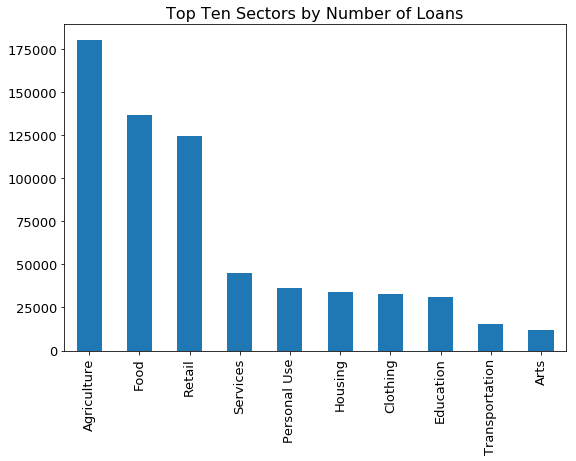

Top Ten Sectors by Number of Loans

 Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Name: sector, dtype: int64


In [23]:
plt.figure(figsize=(9,6))
loans['sector'].value_counts().head(10).plot(kind='bar')
plt.title('Top Ten Sectors by Number of Loans',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print("Top Ten Sectors by Number of Loans\n\n",loans['sector'].value_counts().head(10))

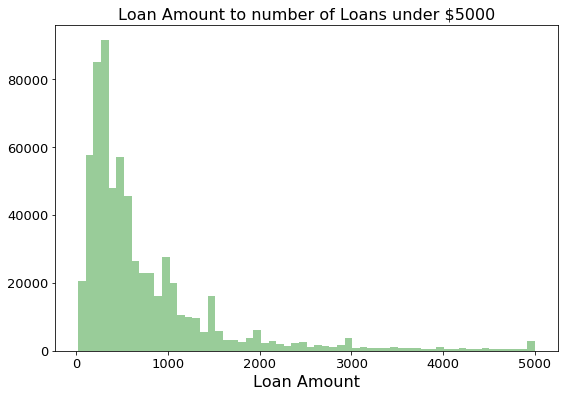


98.6% of all loans were for under $5000 dollars.

The average loan amount (excluding the over $5000 outliers): $751 dollars.


In [27]:
plt.figure(figsize=(9,6))
sns.distplot(loans[loans['loan_amount']<=5000]['loan_amount'],kde=False,bins=60,color='g')
plt.title('Loan Amount to number of Loans under $5000',fontsize=16)
plt.xlabel('Loan Amount',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print('\n{0:.1f}%'.format(len(loans[loans['loan_amount']<=5000]['loan_amount']) / len(loans)*100) + ' of all loans were for under $5000 dollars.')
print('\nThe average loan amount (excluding the over $5000 outliers): ${0:.0f} dollars.'.format(loans[loans['loan_amount']<=5000]['loan_amount'].mean()))

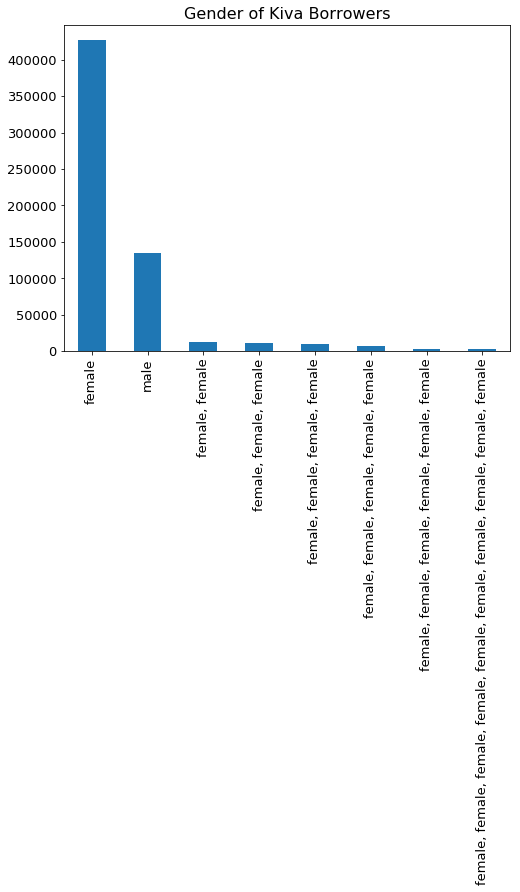

Gender of Kiva Borrowers

female                                                                            426502
male                                                                              134710
female, female                                                                     12164
female, female, female                                                             11676
female, female, female, female                                                      9052
female, female, female, female, female                                              7568
female, female, female, female, female, female                                      2674
female, female, female, female, female, female, female, female, female, female      2185
Name: borrower_genders, dtype: int64

About 20% of the borrowers are male.


In [28]:
plt.figure(figsize=(8,6))
loans['borrower_genders'].value_counts().head(8).plot(kind='bar')
plt.title('Gender of Kiva Borrowers',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print("Gender of Kiva Borrowers\n")
print(loans['borrower_genders'].value_counts().head(8))
print('\nAbout {0:.0f}% of the borrowers are male.'.format(len(loans[loans['borrower_genders']=='male'])/len(loans)*100))

Without a doubt females dominate the Kiva Crowdfunding platform.

In [29]:
loans['year'] = loans['date'].apply(lambda x: int(x[:4]))

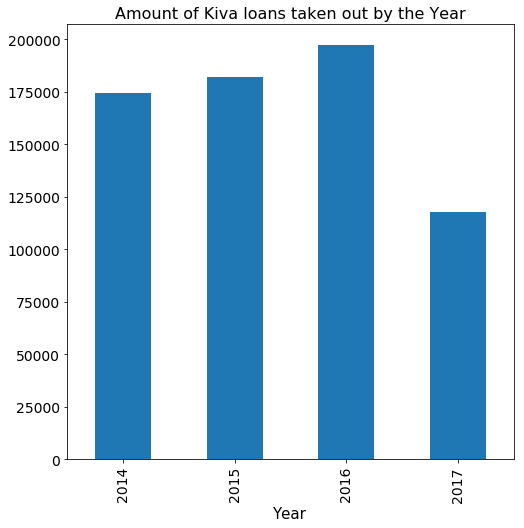

Amount of Kiva loans taken out by the Year

2016    197236
2015    181833
2014    174234
2017    117902
Name: year, dtype: int64


In [44]:
loans.groupby('year')['year'].count().plot(kind="bar",
                                  figsize=(8,8),
                                  fontsize=14)
plt.title('Amount of Kiva loans taken out by the Year',fontsize=16)
plt.xlabel('Year',fontsize=15)
plt.show()
print('Amount of Kiva loans taken out by the Year\n')
print(loans['year'].value_counts())

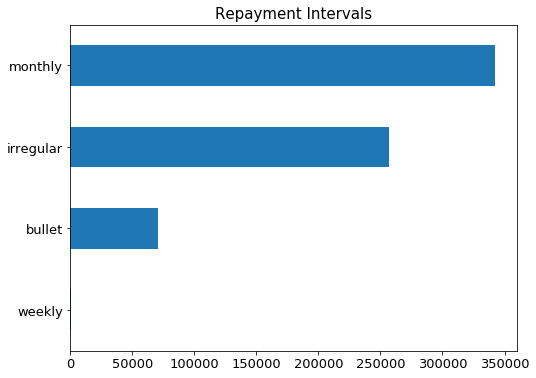

Repayment Intervals

weekly          602
bullet        70728
irregular    257158
monthly      342717
Name: repayment_interval, dtype: int64


In [48]:
plt.figure(figsize=(8,6))
loans['repayment_interval'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Repayment Intervals',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print('Repayment Intervals\n')
print(loans['repayment_interval'].value_counts().sort_values(ascending=True))

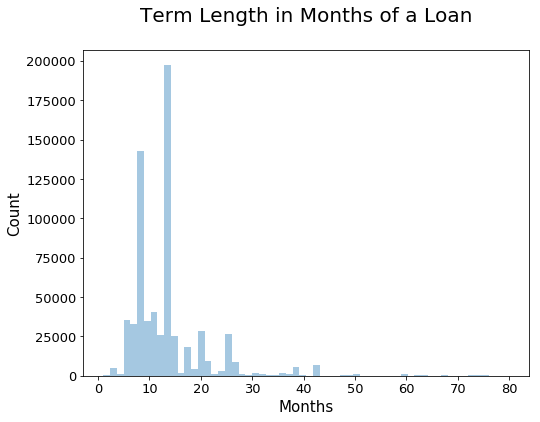

Average Term Length (in months) of a Kiva Loan: 13.739021610387288


In [49]:
plt.figure(figsize=(8,6))
sns.distplot(loans[loans['term_in_months']<=80]['term_in_months'],bins=60,kde=False)
plt.title('Term Length in Months of a Loan\n',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print('Average Term Length (in months) of a Kiva Loan: ' + str(loans['term_in_months'].mean()))

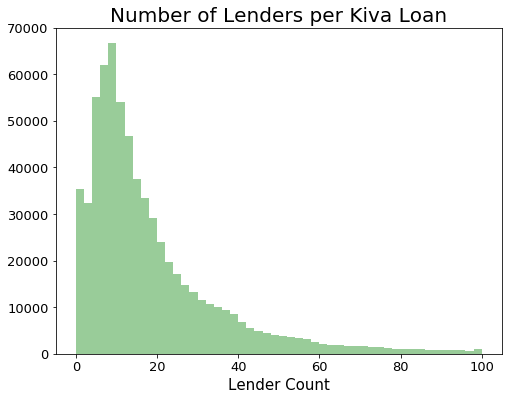

In [50]:
plt.figure(figsize=(8,6))
lenders = loans[loans['lender_count']<=100]['lender_count']
sns.distplot(lenders,bins=50,kde=False,color='g')
plt.title('Number of Lenders per Kiva Loan',fontsize=20)
plt.xlabel('Lender Count',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

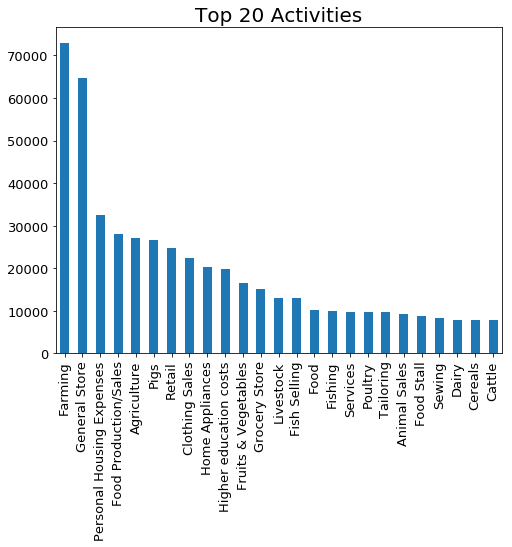

Top 20 Activities

Farming                      72955
General Store                64729
Personal Housing Expenses    32448
Food Production/Sales        28106
Agriculture                  27023
Pigs                         26624
Retail                       24771
Clothing Sales               22339
Home Appliances              20267
Higher education costs       19742
Fruits & Vegetables          16610
Grocery Store                15102
Livestock                    13095
Fish Selling                 13060
Food                         10197
Fishing                      10066
Services                      9807
Poultry                       9783
Tailoring                     9657
Animal Sales                  9237
Food Stall                    8905
Sewing                        8414
Dairy                         7914
Cereals                       7898
Cattle                        7865
Name: activity, dtype: int64


In [54]:
plt.figure(figsize=(8,6))
loans['activity'].value_counts().head(25).plot.bar()
plt.title('Top 20 Activities',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print('Top 20 Activities\n')
print(loans['activity'].value_counts().head(25))

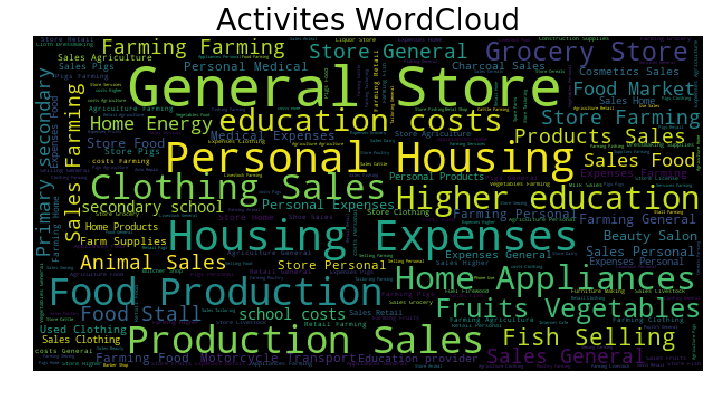

In [55]:
#WordCloud for Activity

activities = loans['activity'][-pd.isnull(loans['activity'])]
wordcloud = WordCloud(max_font_size=50,
                      background_color='black',
                      width=600,
                      height=300).generate(' '.join(activities))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.title('Activites WordCloud',fontsize=30)
plt.axis('off')
plt.show()

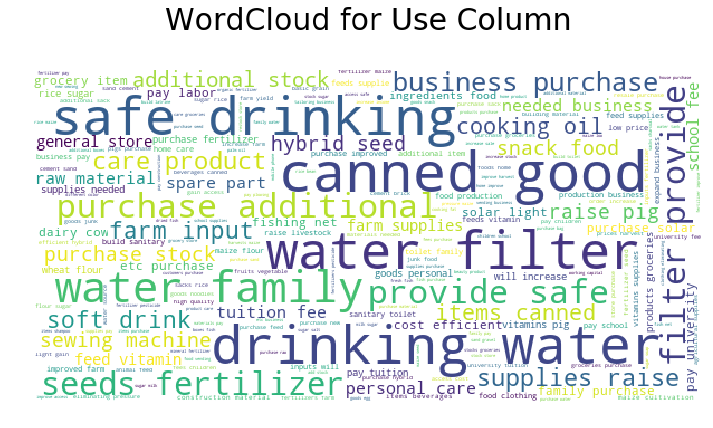

In [56]:
#WordCloud for Use

stopwords = set(STOPWORDS)
#more stopwords
more_stopwords = ['buy','sell']
stopwords.update(more_stopwords)

use_desc = loans['use'][-pd.isnull(loans['use'])]
wordcloud = WordCloud(max_font_size=50,
                      stopwords=stopwords,
                      background_color='white',
                      width=600,
                      height=300).generate(' '.join(use_desc))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.title('WordCloud for Use Column\n',fontsize=30)
plt.axis('off')
plt.show()

I added 'buy' and 'sell' to the stopword already included. I think it is fairly obvious that the reason to take out a micro loan would be to buy or sell. Those are redundant words.

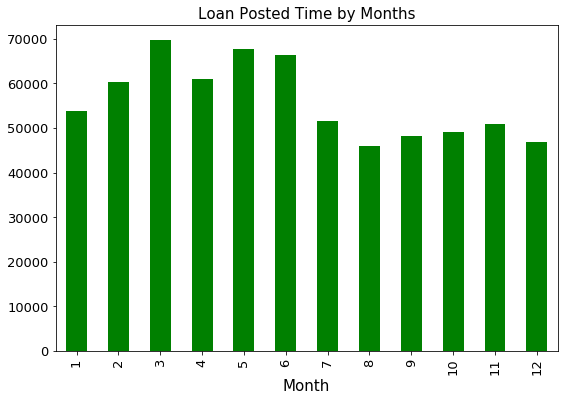

In [61]:
plt.figure(figsize=(9,6))
loans.groupby('month(post)').count()['posted_time'].plot(kind='bar',color='green')
plt.title('Loan Posted Time by Months',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

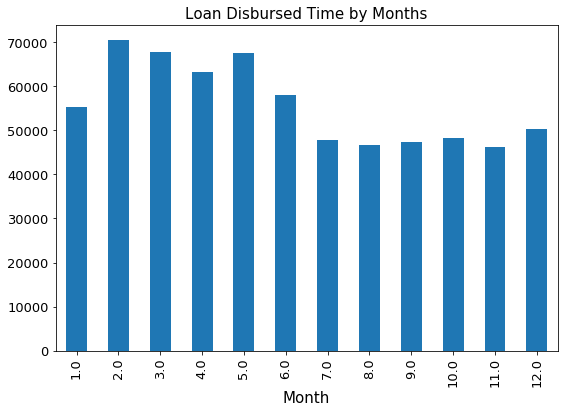

In [63]:
plt.figure(figsize=(9,6))
loans.groupby('month(dis)').count()['posted_time'].plot(kind='bar')
plt.title('Loan Disbursed Time by Months',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

There is more loan activity in the first half of the year rather than the second half of the year.

# Bivariate Analysis

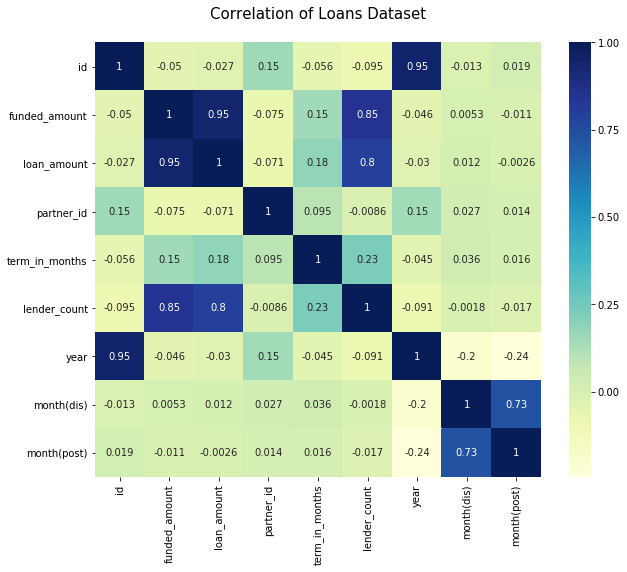

In [64]:
corr = loans.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            cmap='YlGnBu',
            annot=True)
plt.title('Correlation of Loans Dataset\n',fontsize=15)
plt.show()

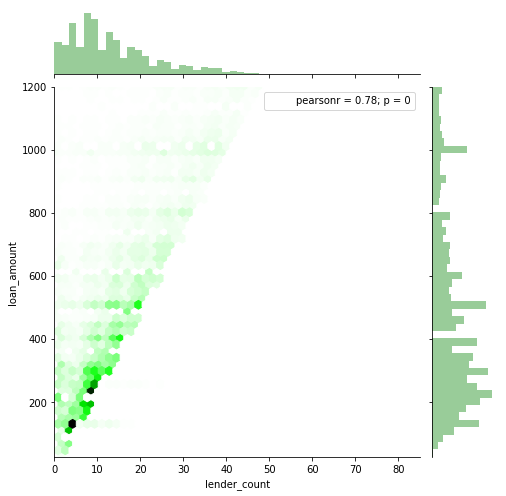

In [65]:
sns.jointplot(data=loans[(loans['loan_amount']<=1200)&(loans['term_in_months']<=30)],
              x='lender_count',
              y='loan_amount',
              kind='hex',
              color='g',
              size=7)

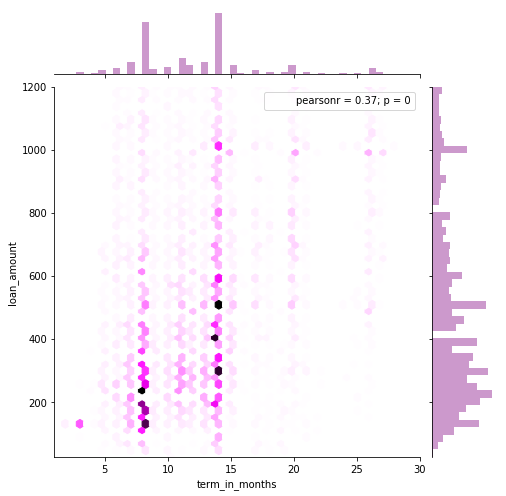

In [66]:
sns.jointplot(data=loans[(loans['loan_amount']<=1200)&(loans['term_in_months']<=30)],
              x='term_in_months',
              y='loan_amount',
              kind='hex',
              color='purple',
              size=7)

In [67]:
countryUnfiltered = loans.groupby('country').mean()['funded_amount'].sort_values(ascending=False)

In [68]:
data = [dict(
        type = 'choropleth',
        locations = countryUnfiltered.index,
        locationmode = 'country names',
        z = countryUnfiltered.values,
        text = countryUnfiltered.index,
        colorscale = 'Blue',
        marker = dict(
            line=dict(width=.7)),
            colorbar = dict(
            autotick = False, 
            tickprefix = '$',
            title = 'Loan Amount'),)]
layout = dict(title = 'Average Loan Amount by Country',
             geo = dict(
                 showframe = False,
                 #showcoastlines = False,
                 projection = dict(
                 type = 'Mercatorodes')))
fig = dict(data=data, layout=layout)
py.iplot(fig,validate=False)
print('Average Loan Amount by Country\n',countryUnfiltered.head(15))

Average Loan Amount by Country
 country
Cote D'Ivoire                           50000.000000
Mauritania                              15000.000000
Bhutan                                   7812.500000
Chile                                    7625.000000
Afghanistan                              7000.000000
Congo                                    6142.578125
Puerto Rico                              4409.191176
Dominican Republic                       4200.604839
Namibia                                  4046.875000
United States                            3800.843591
Israel                                   3786.578947
The Democratic Republic of the Congo     3586.161731
Saint Vincent and the Grenadines         3076.562500
Somalia                                  3011.666667
Burundi                                  2907.443182
Name: funded_amount, dtype: float64


The data above is misleading in that the top 'funded' countries are also the countries with only a few loans. Let's filter out the countries with less than 50 loans to get a better idea of who the top funded countries are.

In [69]:
countryFiltered = loans.groupby('country').filter(lambda x: len(x) > 50)
fundedFilterer = countryFiltered.groupby('country').mean()['funded_amount'].sort_values(ascending=False)

In [70]:
data = [dict(
        type = 'choropleth',
        locations = fundedFilterer.index,
        locationmode = 'country names',
        z = fundedFilterer.values,
        text = fundedFilterer.index,
        colorscale = 'Blue',
        marker = dict(
            line=dict(width=.7)),
        colorbar = dict(
            autotick = False, 
            tickprefix = '$',
            title = 'Loan Amount'),)]
layout = dict(title = 'Average Loan Amount by Country',
             geo = dict(
                 showframe = False,
                 #showcoastlines = False,
                 projection = dict(
                 type = 'Mercatorodes')))
fig = dict(data=data, layout=layout)
py.iplot(fig,validate=False)
print('Filtered Average of Loans by Country\n',fundedFilterer.head(15))

Filtered Average of Loans by Country
 country
Congo                                   6142.578125
Puerto Rico                             4409.191176
Dominican Republic                      4200.604839
United States                           3800.843591
Israel                                  3786.578947
The Democratic Republic of the Congo    3586.161731
Somalia                                 3011.666667
Burundi                                 2907.443182
China                                   2787.126866
Iraq                                    2629.632427
Paraguay                                2471.032513
Suriname                                2423.654709
Thailand                                2351.944444
Brazil                                  2327.552817
Rwanda                                  2302.242019
Name: funded_amount, dtype: float64


# Loan Activity - USA v MEX

In [152]:
usa = loans[loans['country']=='United States']
mex = loans[loans['country']=='Mexico']

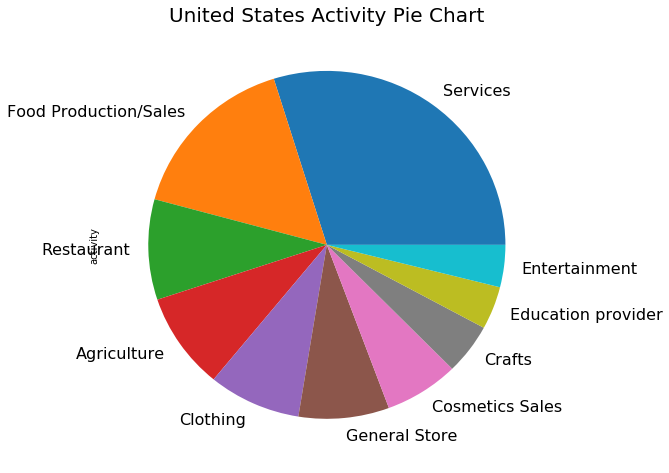

In [165]:
usa['activity'].value_counts().head(10).plot(kind='pie',
                                            fontsize=16,
                                            figsize=(8,8))
plt.title('United States Activity Pie Chart',fontsize=20)
plt.show()

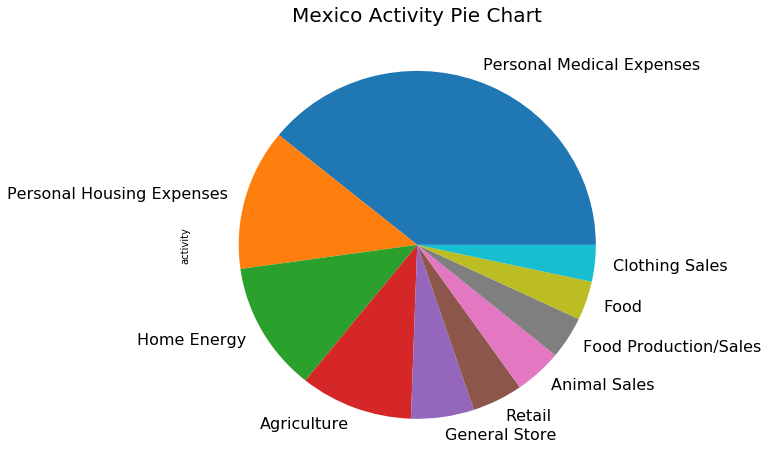

In [164]:
mex['activity'].value_counts().head(10).plot(kind='pie',
                                            fontsize=16,
                                            figsize=(8,8))
plt.title('Mexico Activity Pie Chart',fontsize=20)
plt.show()

In [177]:
print('Loan Activity in Monterrey, Mexico:\n\n',mex[mex['region']=='Monterrey']['activity'].value_counts())

Loan Activity in Monterrey, Mexico:

 Personal Medical Expenses    760
Health                        38
Medical Clinic                 1
Name: activity, dtype: int64


These simple pie charts and table show that not all Kiva loans are used for entrepreneurial purposes, and that some countries, and regions within countries, use this capital for different purposes. The table above shows the ENTIRE loan activity distribution of Monterrey, Mexico.

# Loan Themes by Region

In [72]:
loan_theme = pd.read_csv('loan_themes_by_region.csv')

In [73]:
loan_theme.shape

(15736, 21)

In [88]:
loan_theme.head(3)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0


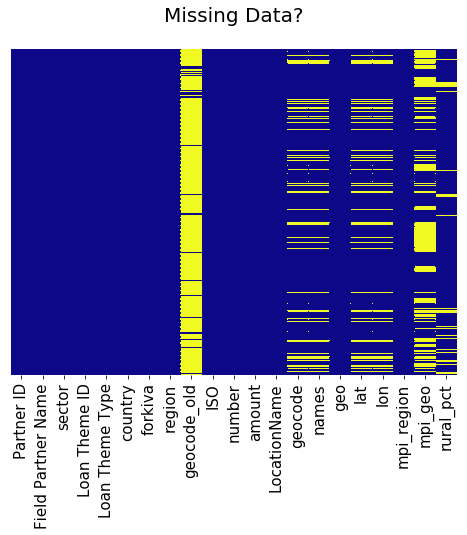

In [89]:
plt.figure(figsize=(8,6))
sns.heatmap(loan_theme.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.title('Missing Data?\n',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

# Region Univariate Analysis

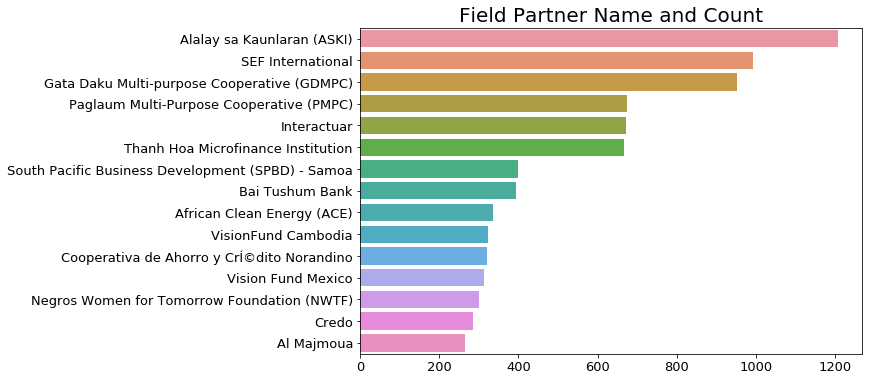

Field Partner Name and Count

Alalay sa Kaunlaran (ASKI)                           1207
SEF International                                     992
Gata Daku Multi-purpose Cooperative (GDMPC)           952
Paglaum Multi-Purpose Cooperative (PMPC)              673
Interactuar                                           671
Thanh Hoa Microfinance Institution                    666
South Pacific Business Development (SPBD) - Samoa     398
Bai Tushum Bank                                       393
African Clean Energy (ACE)                            336
VisionFund Cambodia                                   324
Cooperativa de Ahorro y CrÍ©dito Norandino            320
Vision Fund Mexico                                    313
Negros Women for Tomorrow Foundation (NWTF)           300
Credo                                                 285
Al Majmoua                                            266
Name: Field Partner Name, dtype: int64


In [91]:
plt.figure(figsize=(9,6))
count = loan_theme['Field Partner Name'].value_counts().head(15)
sns.barplot(count.values, count.index)
plt.title('Field Partner Name and Count',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print('Field Partner Name and Count\n')
print(count)

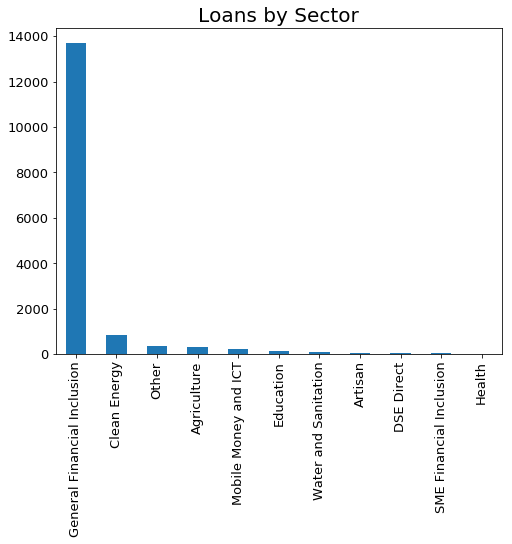

Loans by Sector

General Financial Inclusion    13679
Clean Energy                     840
Other                            338
Agriculture                      300
Mobile Money and ICT             210
Education                        143
Water and Sanitation              92
Artisan                           55
DSE Direct                        45
SME Financial Inclusion           32
Health                             2
Name: sector, dtype: int64


In [92]:
plt.figure(figsize=(8,6))
loan_theme['sector'].value_counts().plot(kind='bar')
plt.title('Loans by Sector',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print('Loans by Sector\n')
print(loan_theme['sector'].value_counts())

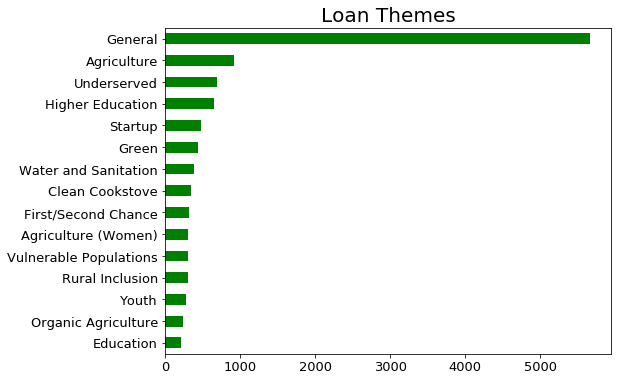

Loan Theme Type

General                   5661
Agriculture                919
Underserved                696
Higher Education           649
Startup                    485
Green                      437
Water and Sanitation       390
Clean Cookstove            341
First/Second Chance        323
Agriculture (Women)        310
Vulnerable Populations     303
Rural Inclusion            302
Youth                      281
Organic Agriculture        242
Education                  210
Name: Loan Theme Type, dtype: int64


In [93]:
plt.figure(figsize=(8,6))
loan_theme['Loan Theme Type'].value_counts().sort_values(ascending=True).tail(15).plot(kind='barh',color='g')
plt.title('Loan Themes',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print('Loan Theme Type\n')
print(loan_theme['Loan Theme Type'].value_counts().head(15))

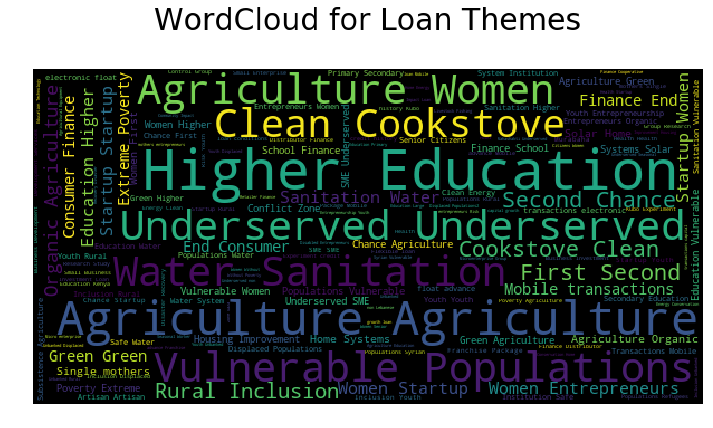

In [90]:
#WordCloud for Use

stopwords = set(STOPWORDS)
more_stopwords = ['buy','sell','general']
stopwords.update(more_stopwords)

themes = loan_theme['Loan Theme Type'][-pd.isnull(loan_theme['Loan Theme Type'])]
wordcloud = WordCloud(max_font_size=50,
                      stopwords=stopwords,
                      background_color='black',
                      width=600,
                      height=300).generate(' '.join(themes))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.title('WordCloud for Loan Themes\n',fontsize=30)
plt.axis('off')
plt.show()

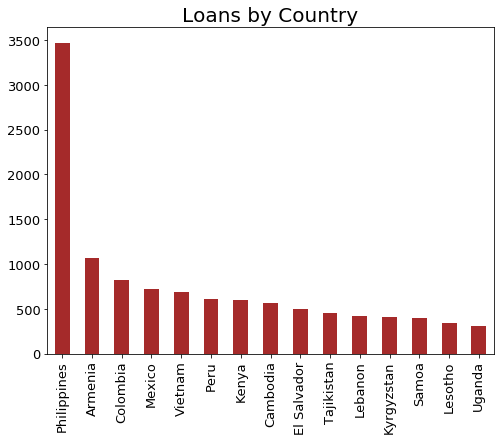

Loans by Country

Philippines    3467
Armenia        1064
Colombia        824
Mexico          716
Vietnam         687
Peru            609
Kenya           593
Cambodia        567
El Salvador     496
Tajikistan      454
Lebanon         416
Kyrgyzstan      412
Samoa           398
Lesotho         336
Uganda          304
Name: country, dtype: int64


In [94]:
plt.figure(figsize=(8,6))
loan_theme['country'].value_counts().head(15).plot(kind='bar',color='brown')
plt.title('Loans by Country',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print('Loans by Country\n')
print(loan_theme['country'].value_counts().head(15))

In [81]:
location = loan_theme.groupby('country')['country'].count().sort_values(ascending=False)
data = [dict(
        type = 'choropleth',
        locations = location.index,
        locationmode = 'country names',
        z = location.values,
        text = location.index,
        colorscale = 'Blue',
        marker = dict(
            line=dict(width=.7)),
        colorbar = dict(
            autotick = False, 
            tickprefix = '',
            title = 'Number of Loans'),)]
layout = dict(title = 'Number of Loans by Country',
             geo = dict(
                 showframe = False,
                 #showcoastlines = False,
                 projection = dict(
                 type = 'Mercatorodes')))
fig = dict(data=data, layout=layout)
py.iplot(fig,validate=False)

Similar to the other dataset, though some countries are a little off. The Philippines is still the top by quite a margin. 

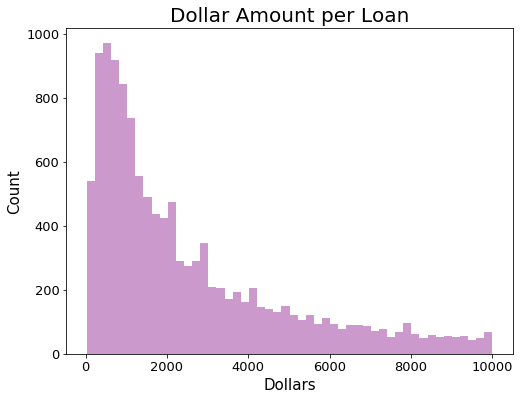

In [95]:
plt.figure(figsize=(8,6))
sns.distplot(loan_theme[loan_theme['amount']<=10000]['amount'],kde=False,bins=50,color='purple')
plt.title('Dollar Amount per Loan',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Dollars',fontsize=15)
plt.show()

Filtered out all loans over $10,000 dollars. 

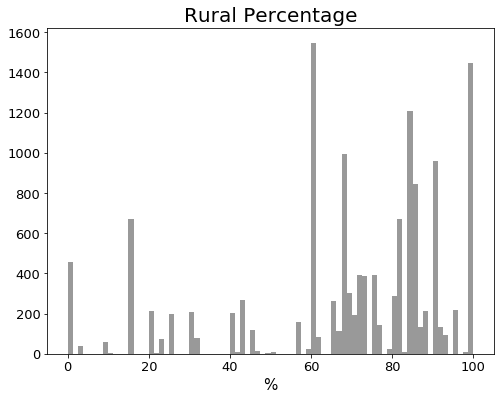

country
Mali           99.213675
Paraguay       99.000000
Ecuador        92.966667
Honduras       90.370079
Samoa          90.000000
Lesotho        90.000000
Cambodia       89.717584
Haiti          86.047059
Costa Rica     85.000000
Rwanda         83.687500
Vietnam        82.278020
Peru           81.767947
Cameroon       76.211009
Philippines    75.039262
Kenya          74.360465
Name: rural_pct, dtype: float64

In [98]:
rural = loan_theme.groupby('country').filter(lambda x: len(x) > 50)
plt.figure(figsize=(8,6))
sns.distplot(rural['rural_pct'].dropna(),kde=False,color='black',bins=80)
plt.title('Rural Percentage',fontsize=20)
plt.xlabel('%',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
rural.groupby('country')['rural_pct'].mean().sort_values(ascending=False).head(15)

Filtered out countries with less than 50 instances.

# Region Bivariate Analysis 

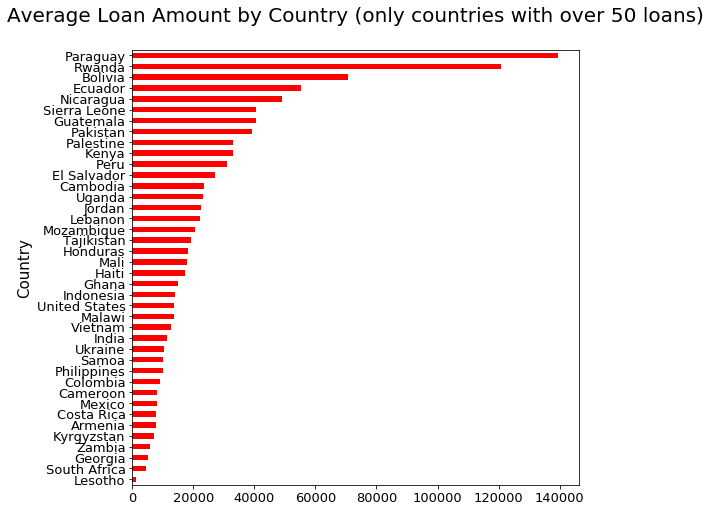

country
Paraguay         139358.214286
Rwanda           120727.163462
Bolivia           70553.963415
Ecuador           55241.329480
Nicaragua         49070.049505
Sierra Leone      40611.111111
Guatemala         40584.005376
Pakistan          39288.325991
Palestine         33057.017544
Kenya             32928.836425
Peru              31141.666667
El Salvador       27072.429435
Cambodia          23596.296296
Uganda            22980.345395
Jordan            22612.291667
Lebanon           22276.322115
Mozambique        20633.771930
Tajikistan        19129.900881
Honduras          18316.716867
Mali              18004.468085
Haiti             17390.368852
Ghana             14842.619048
Indonesia         13857.015306
United States     13703.125000
Malawi            13583.510638
Vietnam           12805.822416
India             11267.483108
Ukraine           10500.000000
Samoa             10183.919598
Philippines        9897.872801
Colombia           8887.348301
Cameroon           8062.844037


In [100]:
countryFilter = loan_theme.groupby('country').filter(lambda x: len(x)>50)
avgCountryAmount = countryFilter.groupby('country')['amount'].mean().sort_values(ascending=True)
avgCountryAmount.plot(kind='barh',figsize=(8,8),color='red')
plt.title('Average Loan Amount by Country (only countries with over 50 loans)\n',fontsize=20)
plt.ylabel('Country',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print(countryFilter.groupby('country')['amount'].mean().sort_values(ascending=False))

In [85]:
data = [dict(
        type = 'choropleth',
        locations = avgCountryAmount.index,
        locationmode = 'country names',
        z = avgCountryAmount.values,
        text = avgCountryAmount.index,
        colorscale = 'Blue',
        marker = dict(
            line=dict(width=.7)),
        colorbar = dict(
            autotick = False, 
            tickprefix = '$',
            title = 'Loan Amount'),)]
layout = dict(title = 'Average Loan Amount by Country',
             geo = dict(
                 showframe = False,
                 #showcoastlines = False,
                 projection = dict(
                 type = 'Mercatorodes')))
fig = dict(data=data, layout=layout)
py.iplot(fig,validate=False)

Hmm. These loan amounts are much higher than the amounts in the other dataset.

In [101]:
partner = loan_theme[['Field Partner Name','country','rural_pct']].dropna()
partner = partner.groupby('Field Partner Name').filter(lambda x: len(x) >= 50)

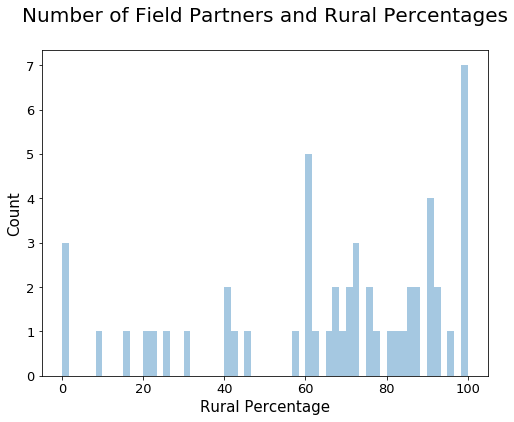

Field Partner Name
myAgro                                                             100.0
VisionFund Cambodia                                                100.0
Kamworks                                                           100.0
Sistema Biobolsa                                                    99.0
Cooperativa de Ahorro y CrÍ©dito Norandino                          99.0
FundaciÍ_n Paraguaya                                                99.0
Juhudi Kilimo                                                       99.0
FUDECOSUR                                                           95.0
Grounded and Holistic Approach for People's Empowerment (GHAPE)     93.0
People's Forum                                                      92.0
Organizacion de Desarrollo Empresarial Femenino (ODEF)              90.0
KREDIT Microfinance Institution                                     90.0
African Clean Energy (ACE)                                          90.0
South Pacific Business Developme

In [103]:
plt.figure(figsize=(8,6))
sns.distplot(partner.groupby('Field Partner Name')['rural_pct'].mean().sort_values(ascending=False),kde=False,bins=60)
plt.title('Number of Field Partners and Rural Percentages\n',fontsize=20)
plt.xlabel('Rural Percentage',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
print(partner.groupby('Field Partner Name')['rural_pct'].mean().sort_values(ascending=False))

This is a list and histogram of the count and rural percentages of the Field Partners with over 50 instances (loans). 

# That is my quick and dirty EDA. Feedback is appreciated!